In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

In [2]:
# Parameters that can be modified by the user
wavenumber_min = 1 # start at wavenumber 1 to avoid division by zero.
wavenumber_max = 300001  #in m-1
step = 1000 # intervals at which to calculate wavenumbers
temperatures = [-30, 0, 20, 50, 70] # temperatures to plot in Celsius

In [3]:
h = 6.626e-34
c = 3.0e+8
k = 1.381e-23

a = 2*h*(c**2)
e = h*c/k

In [4]:
# note: wavenumber is spectroscopy is 1/wavelength, not 2pi/wavelength like in physics
# source: https://arxiv.org/pdf/0901.1863.pdf

In [5]:
def planck(wavenumber, T): # T in Celsius
    radiance = a*(wavenumber**3)/(m.exp(e*wavenumber/T)-1)
    return radiance

In [6]:
def plot_planck(temps):
    wavenums = np.ndarray.tolist(np.arange(wavenumber_min, wavenumber_max, step))
    plt.style.use(['Solarize_Light2', 'seaborn-whitegrid'])
    fig = plt.figure(figsize=(14,9), facecolor='white')

    for t in temps:
        radiances = []
        for w in wavenums:
            radiances.append(planck(w, t+273.15))
        plt.plot([x/100 for x in wavenums], [x*100 for x in radiances], linewidth=3) #divide and multiply by 100 to have it in units of cm-1    

    plt.xlim(0, wavenumber_max/100)
    plt.ylim(0)
    plt.xlabel(r'Wavenumber $cm^{-1}$', fontsize=20, color = 'black')
    plt.ylabel(r'Radiance $W m^{-2} sr^{-1} (cm^{-1})^{-1}$', fontsize=20, color = 'black')
    plt.tick_params(labelsize=16, labelcolor='black')
    legend = plt.legend(temps, fontsize=18, title='T in Celsius', frameon=True)
    plt.setp(legend.get_title(),fontsize=16)
    plt.grid(color='grey', linestyle='--', linewidth=.3)
    plt.title('Blackbody curves', fontsize=20)
    plt.show()
    fig.savefig('BB_curves1.png', dpi=600)
    plt.close()

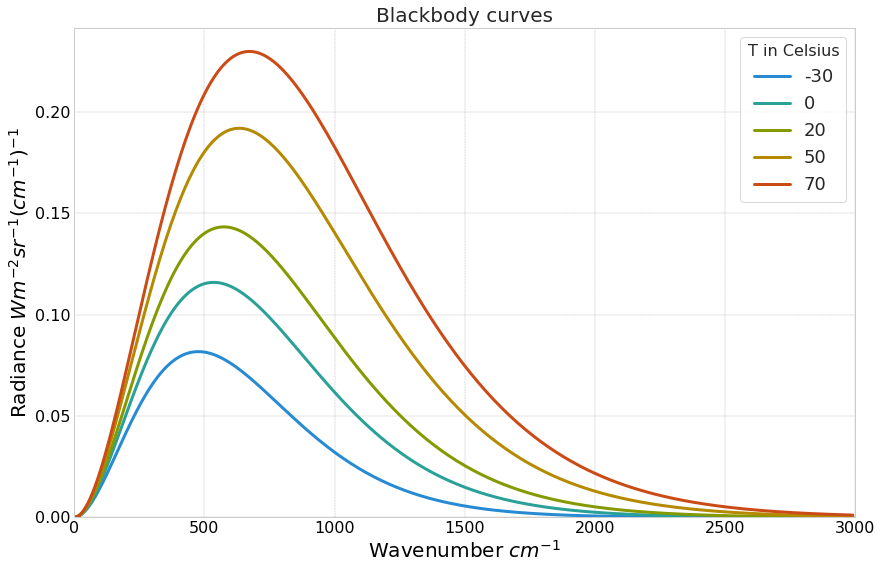

In [7]:
plot_planck(temperatures)